<a href="https://colab.research.google.com/github/spribylova/Python_Hotels/blob/main/hotel_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [45]:
data = pd.read_csv("Hotel_Reviews.csv")
print(data.head())

                  address categories      city country   latitude  longitude  \
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   

                 name postalCode province          reviews.date  \
0  Hotel Russo Palace      30126       GA  2013-09-22T00:00:00Z   
1  Hotel Russo Palace      30126       GA  2015-04-03T00:00:00Z   
2  Hotel Russo Palace      30126       GA  2014-05-13T00:00:00Z   
3  Hotel Russo Palace      30126       GA  2013-10-27T00:00:00Z   
4  Hotel Russo Palace      30126       GA  2015-03-05T00:00:00Z   

      reviews.dateAdded  reviews.doRecommend  reviews.id  reviews.rating  \
0  2016-10-24T00:00:25Z                 

In [46]:
# get the unique countries in the file
data["country"].unique()

array(['US'], dtype=object)

In [ ]:
# get the unique hotel names in the file 
data["name"].unique()

In [16]:
data["reviews.rating"].unique()

array([ 4. ,  5. ,  3. ,  1. ,  2. ,  0. ,  4.1,  nan,  4.9,  4.8,  3.4,
        2.4,  3.1,  3.2,  3.3,  9.6, 10. ,  8.3,  8.8,  9.2,  7.5,  7.9,
        7.1,  3.8,  5.8,  6.7,  6.3,  4.2,  4.5,  3.9,  1.3,  4.3,  4.7,
        2.8,  4.4,  1.5,  4.6,  3.7,  5.4,  2.5,  6. ,  2.9,  7. ,  9.5])

In [49]:
# fill the null reviews of the Hotels with 0
data['reviews.rating']=data['reviews.rating'].fillna(0)

In [50]:
# create a range of 5 maximum review numbers
for i in range(0,len(data)):
   if(data['reviews.rating'].loc[i] > 5):
       temp = data['reviews.rating'].loc[i]
       newtemp = (temp/10)*5
       data.at[i,'reviews.rating'] = newtemp

In [51]:
ratings = data["reviews.rating"].value_counts()
numbers = ratings.index
quantity = ratings.values
ratings

5.00    12772
4.00     9755
3.00     5709
1.00     3068
2.00     2979
0.00     1199
4.80       78
4.60       56
4.40       30
4.30       26
4.15       25
3.75       24
3.95       24
4.20       22
3.40       17
4.10       14
3.15       14
4.50       13
3.55       13
3.35       12
2.70        9
3.10        7
2.90        7
4.70        6
3.30        6
4.90        6
2.40        4
3.80        3
2.50        3
3.20        2
3.90        2
3.70        2
1.30        1
2.80        1
1.50        1
3.50        1
4.75        1
Name: reviews.rating, dtype: int64

In [52]:
# round decimal places in rating
ratings=data['reviews.rating'].round(0).value_counts()

In [53]:
# create indexes from rating value and counts
numbers = ratings.index
quantity = ratings.values

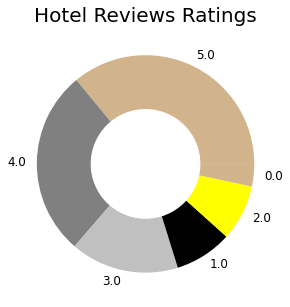

In [54]:
# assign color to each rating and revise the chart to see the share of rating values 
custom_colors = ["tan", "grey", 'silver', "black", "yellow"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

In [55]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [56]:
pip install -q transformers

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
rt = data["reviews.text"]
rt

In [60]:
sid = SentimentIntensityAnalyzer()

In [62]:
pip install TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
